<a href="https://colab.research.google.com/github/jumbokh/csu1112-class/blob/main/notebooks/flags/F2379_CH03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#第3章：Keras 和 TensorFlow 簡介

##3-5 使用 TensorFlow 的第一步

###3-5-1 常數張量與變數

####程式 3.1 創建完全由1或0組成的張量 

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


####程式 3.2 創建由亂數組成的張量

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.93097234]
 [ 0.7025166 ]
 [-1.6040666 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.02808094]
 [0.58782744]
 [0.19864261]], shape=(3, 1), dtype=float32)


####程式 3.3 NumPy 陣列可接受指派新的值

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

####程式 3.5 創建 Variable 物件

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.58490473],
       [ 0.85802084],
       [ 0.85219675]], dtype=float32)>


####程式 3.6 為 Variable 物件指派一個值

In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

####程式 3.7 對 Variable 物件進行局部修改

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

#### 程式 3.8 使用 assign_add() 函式

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

###3-5-2 張量操作：在 TensorFlow 中進行數學運算

####程式 3.9 一些基本的數學操作

In [10]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

###3-5-3 GradientTape API 的進一步說明

####程式 3.10 使用 GradientTape

In [11]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

####程式 3.11 在 GradientTape 中使用常數張量為輸入

In [12]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


####程式 3.12 利用巢狀梯度磁帶計算二階梯度

In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

###3-5-4 端到端的範例：使用 TensorFlow 建立線性分類器

####程式 3.13 在平面上生成兩個類別的隨機資料點



In [14]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

####程式 3.14 將資料點堆疊成shape為(2000, 2)的新陣列

In [15]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

####程式 3.15 產生對應的目標值 (0或1)

In [16]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
            np.ones((num_samples_per_class, 1), dtype="float32")))

####程式 3.16 繪製兩個類別的資料點

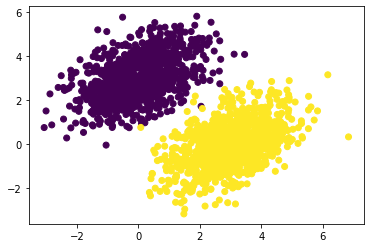

In [17]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

#### 程式 3.17 創建分類器中的變數

In [18]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

####程式 3.18 正向傳播函式

In [19]:
def model(inputs):
    return tf.matmul(inputs, W) + b

####程式 3.19 均方誤差損失函數

In [20]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

####程式 3.20 訓練函式

In [21]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

####程式 3.21 批次訓練迴圈

In [22]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.9255
Loss at step 1: 0.1626
Loss at step 2: 0.1052
Loss at step 3: 0.0924
Loss at step 4: 0.0860
Loss at step 5: 0.0808
Loss at step 6: 0.0761
Loss at step 7: 0.0719
Loss at step 8: 0.0680
Loss at step 9: 0.0644
Loss at step 10: 0.0612
Loss at step 11: 0.0582
Loss at step 12: 0.0555
Loss at step 13: 0.0530
Loss at step 14: 0.0507
Loss at step 15: 0.0486
Loss at step 16: 0.0467
Loss at step 17: 0.0449
Loss at step 18: 0.0433
Loss at step 19: 0.0419
Loss at step 20: 0.0405
Loss at step 21: 0.0393
Loss at step 22: 0.0382
Loss at step 23: 0.0372
Loss at step 24: 0.0362
Loss at step 25: 0.0354
Loss at step 26: 0.0346
Loss at step 27: 0.0339
Loss at step 28: 0.0332
Loss at step 29: 0.0326
Loss at step 30: 0.0321
Loss at step 31: 0.0316
Loss at step 32: 0.0311
Loss at step 33: 0.0307
Loss at step 34: 0.0303
Loss at step 35: 0.0299
Loss at step 36: 0.0296
Loss at step 37: 0.0293
Loss at step 38: 0.0291
Loss at step 39: 0.0288


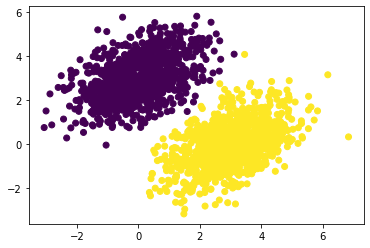

In [23]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

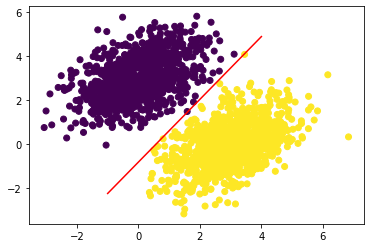

In [24]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

##3-6 剖析神經網路：了解 Keras API 的核心

###3-6-1 Layer (層）：深度學習的基石

####程式 3.22 使用 Layer 類別來實作 Dense 層

In [25]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [26]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [27]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [28]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [29]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

###3-6-3 編譯 (compile) 階段：定義學習的過程

In [30]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [31]:
model.compile(optimizer=keras.optimizers.RMSprop(),
       loss=keras.losses.MeanSquaredError(),
       metrics=[keras.metrics.BinaryAccuracy()])

###3-6-5 搞懂 fit() 方法

####程式 3.23 透過 NumPy 資料來呼叫 fit()

In [32]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 3s 9ms/step - loss: 15.6532 - binary_accuracy: 0.0065
Epoch 2/5
16/16 [==============================] - 0s 10ms/step - loss: 15.1709 - binary_accuracy: 0.0065
Epoch 3/5
16/16 [==============================] - 0s 8ms/step - loss: 14.7595 - binary_accuracy: 0.0065
Epoch 4/5
16/16 [==============================] - 0s 12ms/step - loss: 14.3638 - binary_accuracy: 0.0065
Epoch 5/5
16/16 [==============================] - 0s 9ms/step - loss: 13.9737 - binary_accuracy: 0.0065


In [33]:
history.history

{'loss': [15.653177261352539,
  15.170860290527344,
  14.759469985961914,
  14.363774299621582,
  13.973658561706543],
 'binary_accuracy': [0.006500000134110451,
  0.006500000134110451,
  0.006500000134110451,
  0.006500000134110451,
  0.006500000134110451]}

###3-6-6 用驗證資料來監控損失值和指標

####程式 3.24 使用 vailidation_data 參數

In [34]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
       loss=keras.losses.MeanSquaredError(),
       metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 3s 14ms/step - loss: 0.5826 - binary_accuracy: 0.8529 - val_loss: 0.0285 - val_binary_accuracy: 0.9967
Epoch 2/5
88/88 [==============================] - 1s 12ms/step - loss: 0.0651 - binary_accuracy: 0.9629 - val_loss: 0.0260 - val_binary_accuracy: 0.9967
Epoch 3/5
88/88 [==============================] - 2s 18ms/step - loss: 0.0717 - binary_accuracy: 0.9579 - val_loss: 0.2096 - val_binary_accuracy: 0.7233
Epoch 4/5
88/88 [==============================] - 1s 13ms/step - loss: 0.0732 - binary_accuracy: 0.9536 - val_loss: 0.1297 - val_binary_accuracy: 0.9700
Epoch 5/5
88/88 [==============================] - 3s 29ms/step - loss: 0.0744 - binary_accuracy: 0.9500 - val_loss: 0.0976 - val_binary_accuracy: 0.9650


###3-6-7 推論 (Inference) 階段：使用訓練好的模型來預測

In [35]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 6ms/step
[[ 0.4301415 ]
 [ 0.3510785 ]
 [ 1.3904524 ]
 [ 1.1923739 ]
 [-0.14715433]
 [ 1.665202  ]
 [ 0.33953896]
 [ 1.2038794 ]
 [ 1.5543579 ]
 [ 1.2855476 ]]
